# Data extraction

This part mainly extracts the data of 2198 high-entropy alloys.

### Import python libraries

The features_class library is used to create descriptors.

In [1]:
from features_class import *
import pandas as pd
import json
import random

### Read the json file

The json file contains 2198 high-entropy alloys and their corresponding phases.

In [2]:
filename = 'data.json'

with open(filename, 'r')as f_in:
    data = json.load(f_in)

print(data)

{'Al7.4Cr44.8Fe7.7Co9.2Cu30.9': {'scalar': 1}, 'Al8.6Cr44.1Fe7.6Co9.2Cu30.5': {'scalar': 1}, 'Al11.2Cr42.6Fe7.4Co9.1Cu29.7': {'scalar': 1}, 'Al13.5Cr41.1Fe7.4Co8.8Cu29.1': {'scalar': 1}, 'Al15.5Cr39.7Fe7.2Co8.9Cu28.7': {'scalar': 1}, 'Al6.2Cr44.1Fe9.1Co11Cu29.7': {'scalar': 1}, 'Al6.9Cr43.4Fe8.9Co11.1Cu29.8': {'scalar': 1}, 'Al8Cr42.8Fe8.7Co10.9Cu29.6': {'scalar': 1}, 'Al9.7Cr41.7Fe8.8Co10.6Cu29.2': {'scalar': 1}, 'Al12.5Cr40.2Fe8.7Co10.5Cu28.2': {'scalar': 1}, 'Al15Cr38.7Fe8.5Co10.3Cu27.4': {'scalar': 1}, 'Al16.4Cr37.4Fe8.4Co10.2Cu27.5': {'scalar': 1}, 'Al19.8Cr35.7Fe8.1Co10Cu26.5': {'scalar': 1}, 'Al23.9Cr33.5Fe7.8Co9.7Cu25.1': {'scalar': 1}, 'Al5.7Cr41.6Fe10.9Co13.3Cu28.5': {'scalar': 1}, 'Al6.8Cr41.5Fe10.8Co13Cu28': {'scalar': 1}, 'Al7.8Cr40.7Fe10.4Co12.8Cu28.2': {'scalar': 1}, 'Al8.7Cr40.3Fe10.3Co12.5Cu28.2': {'scalar': 1}, 'Al10.6Cr39.1Fe10.3Co12.1Cu27.8': {'scalar': 1}, 'Al13.8Cr37.5Fe9.9Co11.9Cu26.8': {'scalar': 1}, 'Al15.5Cr36.4Fe9.8Co11.9Cu26.3': {'scalar': 1}, 'Al18Cr34.9Fe9

### Read the csv file

The csv file contains the basic information of the seven elements(Al,Cr,Mn,Fe,Co,Ni,Cu,Zn).

In [4]:
fn = 'chemical_elements.csv'
chem_list = f.get_chemicals_list(fn)
elements_data = pd.read_csv(fn, skipinitialspace=True, index_col="symbol")
elements_data.index = elements_data.index.str.strip()

print(elements_data)

        atomicNumber       name  electronegativity   Phi  meltingPoint  s  p  \
symbol                                                                         
Al                13   Aluminum               1.61  4.20           933  2  1   
Cr                24   Chromium               1.66  4.65          2180  1  0   
Mn                25  Manganese               1.55  4.45          1519  2  0   
Fe                26       Iron               1.83  4.93          1811  2  0   
Co                27     Cobalt               1.88  5.10          1768  2  0   
Ni                28     Nickel               1.91  5.20          1728  2  0   
Cu                29     Copper               1.90  4.45          1358  1  0   

         d  f  elasticity  space_group  fbi  radius  
symbol                                               
Al       0  0          76          225    1  1.4317  
Cr       5  0         160          229   -1  1.2491  
Mn       5  0         120          217    0  1.3500  
Fe       

Create an empty array to store feature X and target y.

In [12]:
data_x = np.zeros((len(data), 10))
data_y = np.zeros((len(data), 1))

Shuffle data randomly.

In [13]:
random.seed(10)
keys_list = list(data.keys())
random.shuffle(keys_list)
list_keys_out = []

### Generate data x,y matrix

In [14]:
print('generating data x,y matrix')
for i in range(len(keys_list)):
    key = keys_list[i]
    if i % 500 == 0:
        print(i)
    features = Features(key, chem_list, elements_data)
    features.elemental_composition()
    output = features.get_rest_features()
    data_x[i, :] = output
    data_y[i, 0] = data[key]['scalar']
    list_keys_out.append(key)

generating data x,y matrix
0
500
1000
1500
2000


### Save data (x, y) matrices

In [15]:
print("Number of samples: {}".format(len(data_x)))

np.save('data_x.npy', data_x)
np.save('data_y.npy', data_y)

Number of samples: 2198


### Plot the distribution of phases

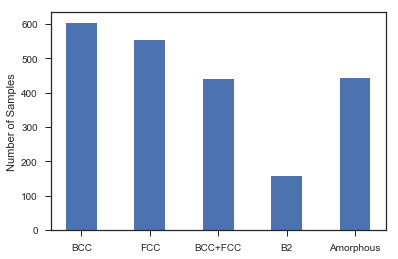

In [17]:
import matplotlib.pyplot as plt

width = 0.45
labels = ['BCC', 'FCC', 'BCC+FCC', 'B2', 'Amorphous']
y_value = data_y.ravel().tolist()
num = [y_value.count(i) for i in range(1,6)]

plt.bar(range(1,6),num,width)
plt.xticks(range(1,6),labels)
plt.ylabel("Number of Samples")
plt.show()